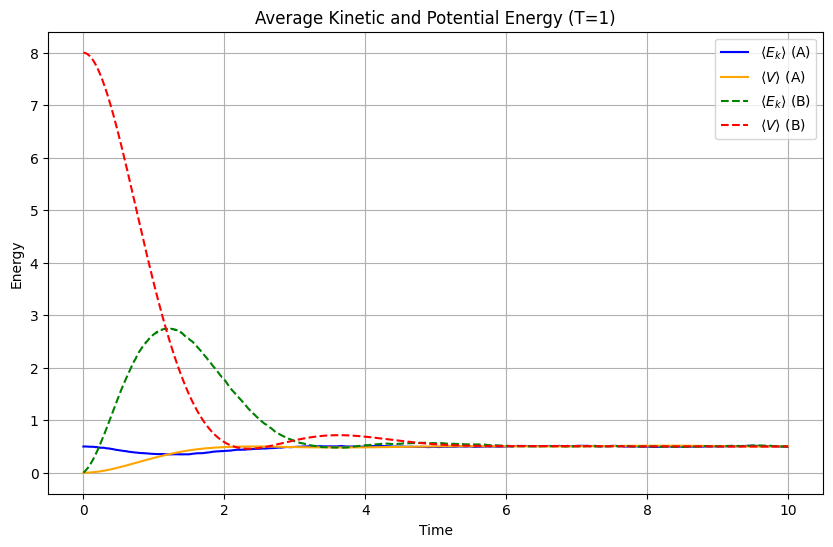

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

M = 1
LAMBDA = 1
KB = 1

def langevin(func_q, initial_q, initial_v, T, num_particles=1000, dt=0.001, total_time=10):
    D = np.sqrt(2 * LAMBDA * KB * T / M)
    num_steps = int(total_time / dt)
    times = np.linspace(0, total_time, num_steps)
    
    avg_kinetic = np.zeros(num_steps)
    avg_potential = np.zeros(num_steps)
    
    q = initial_q * np.ones(num_particles)
    v = initial_v * np.ones(num_particles)
    kinetic = np.zeros((num_particles, num_steps))
    potential = np.zeros((num_particles, num_steps))
    
    for i in range(num_steps):
        dV_dq = (func_q(q + 0.001) - func_q(q - 0.001)) / 0.002
        noise = np.random.normal(0, 1, num_particles)
        v += (-LAMBDA * v - dV_dq) * dt + D * np.sqrt(dt) * noise
        q += v * dt
        
        kinetic[:, i] = 0.5 * M * v**2
        potential[:, i] = func_q(q)
    
    avg_kinetic = np.mean(kinetic, axis=0)
    avg_potential = np.mean(potential, axis=0)

    return times, avg_kinetic, avg_potential

T = 1
num_particles = 10000

def quad_potential(q):
    return 0.5 * q**2

# q=0, v=1
times_A, E_k_A, V_A = langevin(quad_potential, 0, 1, T, num_particles=num_particles)
# q=4, v=0
times_B, E_k_B, V_B = langevin(quad_potential, 4, 0, T, num_particles=num_particles)

plt.figure(figsize=(10, 6))
plt.plot(times_A, E_k_A, label=r'$\langle E_k \rangle$ (A)', color='blue')
plt.plot(times_A, V_A, label=r'$\langle V \rangle$ (A)', color='orange', linestyle='-')
plt.plot(times_B, E_k_B, label=r'$\langle E_k \rangle$ (B)', color='green', linestyle='--')
plt.plot(times_B, V_B, label=r'$\langle V \rangle$ (B)', color='red', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Average Kinetic and Potential Energy (T=1)')
plt.legend()
plt.grid(True)
plt.show()

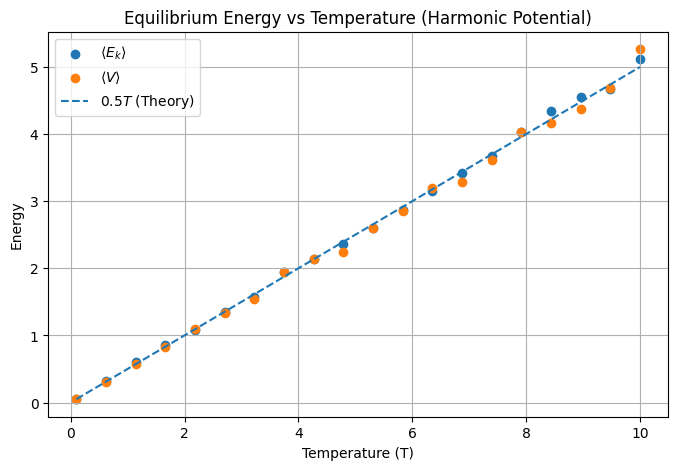

In [32]:
def langevin_t_infty(func_q, T_values, num_particles, dt, tmax, measure_time):
    D_array = np.sqrt(2 * LAMBDA * KB * T_values / M)
    D_array_2d = np.tile(D_array, (num_particles, 1)).T
    D_len = len(D_array)
    measure_steps = int(measure_time / dt)
    total_steps = int(tmax / dt)

    # initial_state = 0
    q = np.zeros((D_len, num_particles))
    v = np.zeros((D_len, num_particles))

    avg_kinetic = np.zeros((D_len, num_particles))
    avg_potential = np.zeros((D_len, num_particles))

    for step in range(total_steps):
        dV_dq = (func_q(q + 0.001) - func_q(q - 0.001)) / 0.002
        noise = np.random.normal(0, 1, (D_len, num_particles))
        v += (-LAMBDA * v - dV_dq) * dt + D_array_2d * np.sqrt(dt) * noise
        q += v * dt

        if tmax - step * dt < measure_time:
            avg_kinetic += 0.5 * M * v**2
            avg_potential += func_q(q)

    avg_kinetic /= measure_steps
    avg_potential /= measure_steps
    return avg_kinetic, avg_potential

T_values = np.linspace(0.1, 10, 20)
num_particles = 1000
dt = 0.01
tmax = 50
measure_time = 5
avg_Ek, avg_V = langevin_t_infty(quad_potential, T_values, num_particles, dt, tmax, measure_time)
avg_Ek_theory = 0.5 * T_values
avg_V_theory = 0.5 * T_values
avg_Ek = np.mean(avg_Ek, axis=1)
avg_V = np.mean(avg_V, axis=1)

# 绘图
plt.figure(figsize=(8, 5))
plt.scatter(T_values, avg_Ek, label=r'$\langle E_k \rangle$')
plt.scatter(T_values, avg_V, label=r'$\langle V \rangle$')
plt.plot(T_values, 0.5*T_values, '--', label=r'$0.5T$ (Theory)')
plt.xlabel('Temperature (T)')
plt.ylabel('Energy')
plt.title('Equilibrium Energy vs Temperature (Harmonic Potential)')
plt.legend()
plt.grid(True)
plt.show()

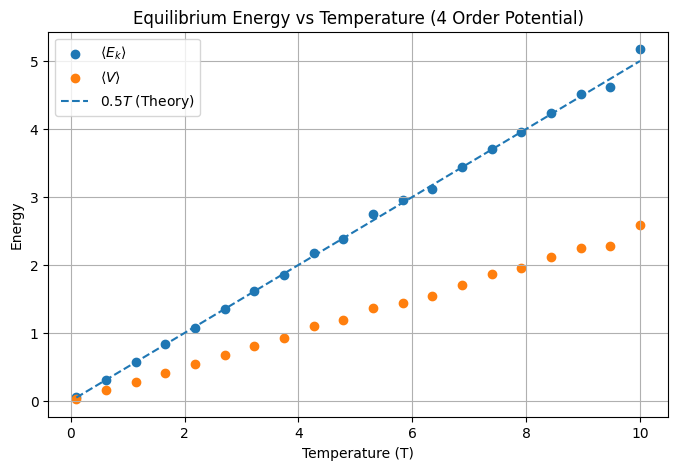

In [34]:
def fourth_order_potential(q):
    return 0.5 * q**4

T_values = np.linspace(0.1, 10, 20)
num_particles = 1000
dt = 0.01
tmax = 50
measure_time = 5
avg_Ek, avg_V = langevin_t_infty(fourth_order_potential, T_values, num_particles, dt, tmax, measure_time)
# 计算理论值
avg_Ek_theory = 0.5 * T_values
avg_V_theory = 0.5 * T_values
# 计算平均值
avg_Ek = np.mean(avg_Ek, axis=1)
avg_V = np.mean(avg_V, axis=1)

# 绘图
plt.figure(figsize=(8, 5))
plt.scatter(T_values, avg_Ek, label=r'$\langle E_k \rangle$')
plt.scatter(T_values, avg_V, label=r'$\langle V \rangle$')
plt.plot(T_values, 0.5*T_values, '--', label=r'$0.5T$ (Theory)')
plt.xlabel('Temperature (T)')
plt.ylabel('Energy')
plt.title('Equilibrium Energy vs Temperature (4 Order Potential)')
plt.legend()
plt.grid(True)
plt.show()